<a href="https://colab.research.google.com/github/Surveshchauhan/GL-CV/blob/main/CV_Week1_Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Case Study: Flowers CNN Classifier</h1>
Flowers dataset (https://www.kaggle.com/alxmamaev/flowers-recognition) 

*Make sure you activate Hardware accelerator in the settings. 
Go to Runtime --> Change runtime type --> Set Hardware Accelerator to GPU*

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Mounting Google Drive on to the Google Colab instance**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

**Set the appropriate path for the datsaet zip provided**

In [2]:
!ls 'drive'

MyDrive  Othercomputers


In [3]:
images_path = "drive/MyDrive/Deep Learning/GL/CV1/flowers.zip"

**Extracting the dataset.zip to the present working directory**

In [4]:
from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  zip.extractall()

In [5]:
# import os
# os.chdir('drive/MyDrive/Deep Learning/GL/CV1/')
# !pwd

In [6]:
!ls

drive  flowers	sample_data


- You can check the currect working directory for the extracted file

### Data Extraction

In [7]:
import os
import cv2

dataset = 'flowers/train'
X = []
y = []
labels = []

# list all folders inside train directory
for i in os.listdir(dataset):
    print(i)
    if i!= '.DS_Store':   #Specific to Mac
      labels.append(i)        
      for j in os.listdir(os.path.join(dataset, i)):
        # read each image inside train directory one by one
        dummy = cv2.imread(os.path.join(dataset, i, j))
        dummy = cv2.resize(dummy, (128, 128))   # Resizing can be any number - 128 is just kept for standard reference
        X.append(dummy)
        y.append(i)

daisy
sunflower
rose
dandelion
tulip


In [8]:
print(len(X), len(y))

3823 3823


- There are totally 3823 flowers in the given dataset with 5 classes

### Data Vizualization

[2462 2719 1719 3099   73 2181  986  897 1117 2617]


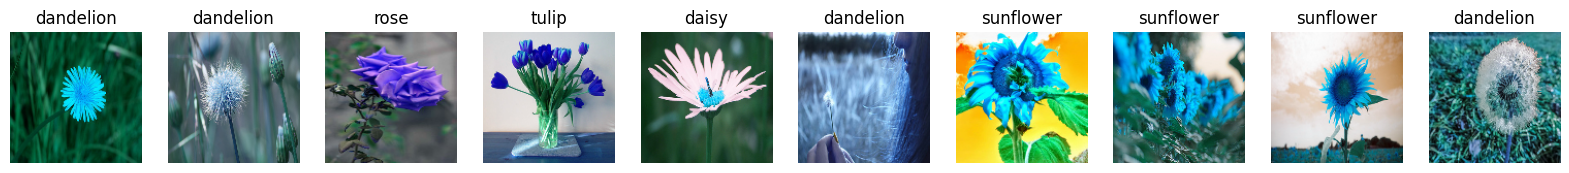

In [9]:
# visualizing the random images in the dataset along with their labels

# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

### Image Exploration and Transformation

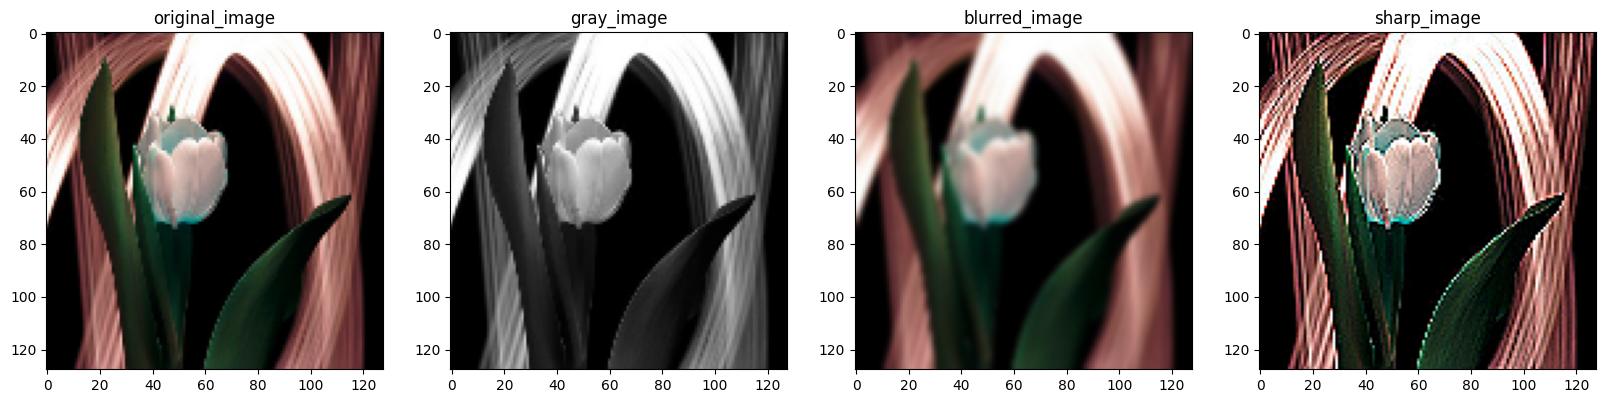

In [10]:
import random

# Original Image
img_org = random.choice(X)

# Gray Image
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)

# Blur Image
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

# Sharp Image
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)

img_title = ['original_image', 'gray_image', 'blurred_image', 'sharp_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, gray_image, blur_img, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

- For further image processing 'pillow' library can be used
- pillow library is one of the important library for image augmentation technique
- We can also use image datagenerator for image augmentation

### Train-Test Split

In [11]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(3823, 128, 128, 3) (3823,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Reshaping the train and test data as per the SL model requirement

X_train_ML = X_train.astype('float32')
X_train_ML = X_train_ML.reshape(X_train_ML.shape[0], 49152) # 128X128X3 = 49152
X_train_ML = X_train_ML/255

X_test_ML = X_test.astype('float32')
X_test_ML = X_test_ML.reshape(X_test_ML.shape[0], 49152)
X_test_ML = X_test_ML/255

#y_train_ML = y_train.reshape(y_train.shape[0], 1)
#y_test_ML = y_test.reshape(y_test.shape[0], 1)


print('Train_Shape:', X_train_ML.shape, y_train.shape)
print('Test_Shape:', X_test_ML.shape, y_test.shape)

Train_Shape: (3058, 49152) (3058,)
Test_Shape: (765, 49152) (765,)


### Model Building - Supervised Learning

In [14]:
# Logistic Regression

from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogR = LogisticRegression()
LogR.fit(X_train_ML, y_train)

y_pred_lrt=LogR.predict(X_train_ML)
LogR_Accuracy_Train = accuracy_score(y_true=y_train, y_pred=y_pred_lrt)
print("Train Accuracy : ", LogR_Accuracy_Train)

y_pred_lrte = LogR.predict(X_test_ML)
LogR_Accuracy_Test = accuracy_score(y_true=y_test, y_pred=y_pred_lrte)
print("Test Accuracy : ", LogR_Accuracy_Test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy :  0.9283845650752126
Test Accuracy :  0.40784313725490196


In [15]:
# NB - Find the best NBs kernels

from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

k=[BernoulliNB,GaussianNB]
for i in range (len(k)):
    NB_Classifier = k[i]()
    NB_Classifier.fit(X_train_ML, y_train)
    print ('kernel is =',k[i], '\tScore=',NB_Classifier.score(X_test_ML, y_test))

kernel is = <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 0.30980392156862746
kernel is = <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 0.41830065359477125


In [16]:
# NB - Model - Gaussian NB is used as per the result from the above code

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = GaussianNB()
NB.fit(X_train_ML, y_train)

y_pred_tr_NB = NB.predict(X_train_ML)
NB_Accuracy_Train=accuracy_score(y_train, y_pred_tr_NB)
print("Train Accuracy: ", NB_Accuracy_Train)

y_pred_ts_NB = NB.predict(X_test_ML)
NB_Accuracy_Test=accuracy_score(y_test, y_pred_ts_NB, normalize = True)
print("Test Accuracy : ", NB_Accuracy_Test)

Train Accuracy:  0.43917593198168736
Test Accuracy :  0.41830065359477125


In [ ]:
# SVM - Model
import time
start = time.time()
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train_ML, y_train)

SVM_Accuracy=SVM.score(X_train_ML, y_train)
print("Train Accuracy : ", SVM_Accuracy)

SVM_Accuracy=SVM.score(X_test_ML, y_test)
print("Test Accuracy : ", SVM_Accuracy)
end =time.time()

print((end-start)/60, " minutes")

In [17]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=3) # Best neighbors to be identified
KNN.fit(X_train_ML, y_train)

y_pred_tr_knn = KNN.predict(X_train_ML)
KNN_Accuracy_Train=accuracy_score(y_train, y_pred_tr_knn)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred_ts_knn = KNN.predict(X_test_ML)
KNN_Accuracy_Test=accuracy_score(y_test, y_pred_ts_knn)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.4921517331589274
Test Accuracy :  0.32287581699346407


In [18]:
# Decision Tree

# Library
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Model
model_DT=DecisionTreeClassifier(criterion='gini',
                                splitter='best',
                                max_depth=5)

model_DT.fit(X_train_ML, y_train)

# Accuracy
DT_Train=model_DT.score(X_train_ML, y_train)
DT_Test=model_DT.score(X_test_ML, y_test)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.4892086330935252
Test Accuracy: 0.3803921568627451


In [19]:
# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=20,
                                    criterion='gini',
                                    max_depth=5)
model_RF.fit(X_train_ML, y_train)

# Accuracy
pred_RF = model_RF.predict(X_test_ML)
RF_Train = model_RF.score(X_train_ML, y_train)
RF_Test = accuracy_score(y_test, pred_RF)   

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 0.6425768476128189
Test Accuracy: 0.47581699346405226


In [21]:
# ADA Boosting

# Library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Model
model = AdaBoostClassifier( base_estimator=RandomForestClassifier(),    # SVC(), RandomForestClassifier(), GradientBoostingClassifier()
                            n_estimators=10,)
model_AB = model.fit(X_train_ML, y_train)

# Accuracy
AB_Train = model_AB.score(X_train_ML, y_train)
pred_AB =model_AB.predict(X_test_ML)
acc_AB = accuracy_score(y_test, pred_AB)

print("Train Accuracy:",AB_Train)
print("Test Accuracy:",acc_AB)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
# GRADIENT BOOSTING

# Library
from sklearn.ensemble import GradientBoostingClassifier

# Model
model = GradientBoostingClassifier(loss='deviance',
                                    learning_rate=0.1,
                                    n_estimators=10)
model_GB = model.fit(X_train_ML, y_train)

# Accuracy
GB_Train = model_GB.score(X_train_ML, y_train)
pred_GB =model_GB.predict(X_test_ML)
acc_GB = accuracy_score(y_test, pred_GB)

print("Training Accuracy:",GB_Train)
print("Testing Accuracy:",acc_GB)

In [22]:
# Changing the Target parameter as per the requirement of the NN model

# one hot encode outputs
import pandas as pd
y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

In [23]:
### define model

import tensorflow 
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


# create model
model = Sequential()  
model.add(BatchNormalization(input_shape = (49152,)))  ### Batch_Norm Layer
    
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
    
# Compile model
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

# Fit the model
histroy = model.fit(X_train_ML, y_train_NN, validation_data=(X_test_ML, y_test_NN), epochs=30, batch_size=8, verbose=1)

Epoch 1/30
383/383 [==============================] - 10s 9ms/step - loss: 3.5262 - accuracy: 0.2525 - val_loss: 1.6160 - val_accuracy: 0.2732
Epoch 2/30
383/383 [==============================] - 3s 9ms/step - loss: 1.7223 - accuracy: 0.2639 - val_loss: 1.5156 - val_accuracy: 0.3059
Epoch 3/30
383/383 [==============================] - 3s 7ms/step - loss: 1.5706 - accuracy: 0.2923 - val_loss: 1.4532 - val_accuracy: 0.3294
Epoch 4/30
383/383 [==============================] - 3s 7ms/step - loss: 1.4967 - accuracy: 0.3414 - val_loss: 1.3741 - val_accuracy: 0.4131
Epoch 5/30
383/383 [==============================] - 3s 7ms/step - loss: 1.4300 - accuracy: 0.3702 - val_loss: 1.3359 - val_accuracy: 0.3987
Epoch 6/30
383/383 [==============================] - 3s 8ms/step - loss: 1.3968 - accuracy: 0.3859 - val_loss: 1.3278 - val_accuracy: 0.4052
Epoch 7/30
383/383 [==============================] - 3s 8ms/step - loss: 1.3562 - accuracy: 0.3954 - val_loss: 1.3509 - val_accuracy: 0.4314
Epoch

Text(0.5, 1.0, 'Training and validation loss')

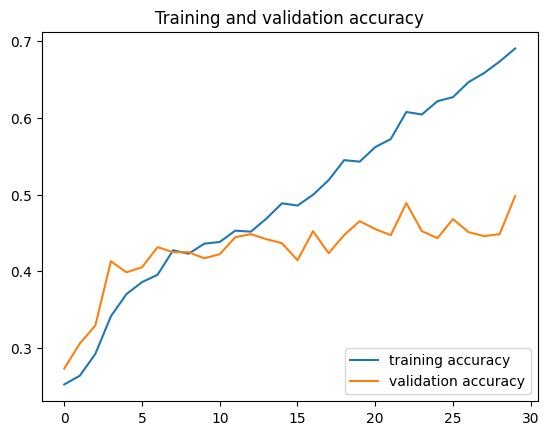

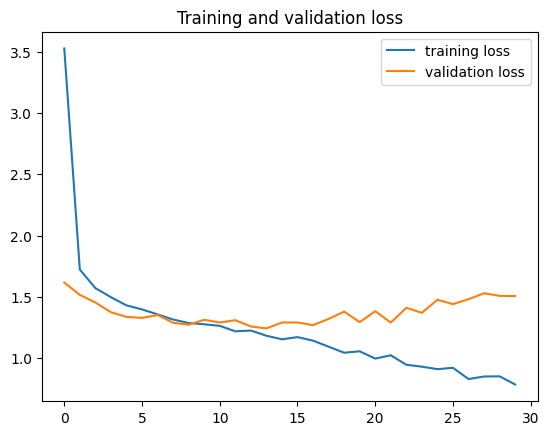

In [25]:
## Accuracy and Loss plots

accuracy      = histroy.history['accuracy']
val_accuracy  = histroy.history['val_accuracy']
loss     = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
# Comparison table

Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 'Train accuracy': LogR_Accuracy_Train, 
                           'Test accuracy': LogR_Accuracy_Test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Naive Bayes Regression'], 'Train accuracy': NB_Accuracy_Train, 
                           'Test accuracy': NB_Accuracy_Test},)
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'], 'Train accuracy': KNN_Accuracy_Train, 
                           'Test accuracy': KNN_Accuracy_Test})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]


Comparison4 = pd.DataFrame({'Method':['SVM'], 'Train accuracy': DT_Train, 
                           'Test accuracy': DT_Test})
Comparison4 = Comparison4[['Method', 'Train accuracy', 'Test accuracy']]


Comparison5 = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': LogR_Accuracy_Train, 
                            'Test accuracy': LogR_Accuracy_Test})
Comparison5 = Comparison5[['Method', 'Train accuracy', 'Test accuracy']]



Comparison6 = pd.DataFrame({'Method':['Random Forest'], 'Train accuracy': RF_Train, 
                           'Test accuracy': RF_Test})
Comparison6 = Comparison6[['Method', 'Train accuracy', 'Test accuracy']]



Comparison7 = pd.DataFrame({'Method':['Gradient Boosting'], 'Train accuracy': GB_Train, 
                           'Test accuracy': acc_GB})
Comparison7 = Comparison7[['Method', 'Train accuracy', 'Test accuracy']]



Comparison8 = pd.DataFrame({'Method':['ADA Boosting'], 'Train accuracy': AB_Train, 
                           'Test accuracy': acc_AB})
Comparison8 = Comparison8[['Method', 'Train accuracy', 'Test accuracy']]


Comparison9 = pd.DataFrame({'Method':['Neural Network'], 'Train accuracy': max(accuracy), 
                           'Test accuracy': max(val_accuracy)})
Comparison9 = Comparison9[['Method', 'Train accuracy', 'Test accuracy']]

Comparison = pd.concat([Comparison1, Comparison2,Comparison3,Comparison4,Comparison5,Comparison6,
                        Comparison7,Comparison8, Comparison9])

Comparison

- On comapring the model performance between NN tend to perform comparitively better than all the other supervized learning models

labels: ['daisy', 'sunflower', 'rose', 'dandelion', 'tulip']
1/1 [==============================] - 0s 108ms/step
Softmax Outputs: [[0.01354229 0.17749259 0.00946329 0.57633716 0.22316466]]
1.0
Predicted_Label: dandelion


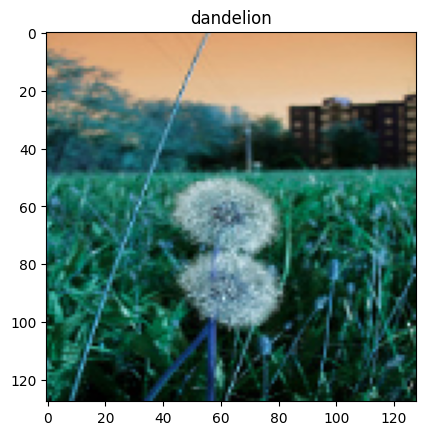

In [26]:
# Predicting and vizualizing the test image

import matplotlib.pyplot as plt
%matplotlib inline

n = 100

print('labels:', labels)
plt.title(y_test[n])
plt.imshow(X_test[n])
y_pred = model.predict(X_test_ML[n].reshape(1, 49152))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())


# Convert the predicted probabilities to labels

for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('Predicted_Label:', labels[j])